In [3]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline
#!pip install researchpy
import researchpy
#!pip install pingouin
import pingouin as pg

0.22.2.post1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 204kB 5.4MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=35f40cccab1eba54eeb4fb44cea2150639b87737e0d91df7c03a297106346ea0
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for outdated: filename=outdated-0.2.0-cp37-none-any.whl size=4962 sha256=1b9c924898226fde95ae0046ead7dfcb00c5bc4744f2918b5c6185b510d289ff
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=fea8e2a9c670ce682e3e9406f3c67ea4b3a7f0bfd36fed7312a6a80877753aac
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [4]:
df_train=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [7]:
df_train.dropna(inplace=True)
# df_train

In [13]:
# Q1
# Continuous (Age) v.s. Discrete (Survived)
aov=pg.anova(data=df_train,dv='Age',between='Survived',detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived,2875.522529,1,2875.522529,12.491639,0.000519,0.064559
1,Within,41665.436185,181,230.195780,NaN,NaN,NaN


In [14]:
aov.SS

0     2875.522529
1    41665.436185
Name: SS, dtype: float64

In [9]:
etasq=aov.SS[0]/(aov.SS[0]+aov.SS[1])
etasq

0.06455906231842591

In [15]:
def judgement_etaSq(etaSq):
  if etaSq < 0.01:
    qual='Negligible'
  elif etaSq < 0.06:
    qual='Small'
  elif etaSq < 0.14:
    qual='Medium'
  else:
    qual='Large'
  return (qual)
judgement_etaSq(etasq)
# Age 與 Survived 呈中度線性相關

'Medium'

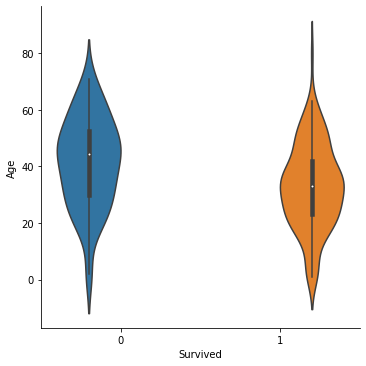

In [31]:
g=sns.catplot(x='Survived',y='Age',hue='Survived',data=df_train,kind='violin')

In [16]:
# Q2
# Discrete (Sex) v.s. Discrete (Sirvived)
conTable=pd.crosstab(df_train['Sex'],df_train['Survived'])
conTable

Survived,0,1
Sex,,
female,6,82
male,54,41


In [26]:
df=min(conTable.shape[0],conTable.shape[1])-1
print("Degree of freedom is",df)
crosstab,res=researchpy.crosstab(df_train['Sex'],df_train['Survived'],test='chi-square')
print("Cramer's value is",res.loc[2,'results'])
def judgement_CramerV(df,V):
  if df == 1:
    if V < 0.10:
      qual='negligible'
    elif V< 0.30:
      qual='small'
    elif V< 0.50:
      qual='medium'
    else:
      qual='large' 
  elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
  elif df == 3:
      if V < 0.06:
          qual = 'negligible'
      elif V < 0.17:
          qual = 'small'
      elif V < 0.29:
          qual = 'medium'
      else:
          qual = 'large'
  elif df == 4:
      if V < 0.05:
          qual = 'negligible'
      elif V < 0.15:
          qual = 'small'
      elif V < 0.25:
          qual = 'medium'
      else:
          qual = 'large'
  else:
      if V < 0.05:
          qual = 'negligible'
      elif V < 0.13:
          qual = 'small'
      elif V < 0.22:
          qual = 'medium'
      else:
          qual = 'large'
  return(qual)
judgement_CramerV(df,res.loc[2,'results'])
# Sex 與 Survived 成高度線性相關

Degree of freedom is 1
Cramer's value is 0.5324


'large'

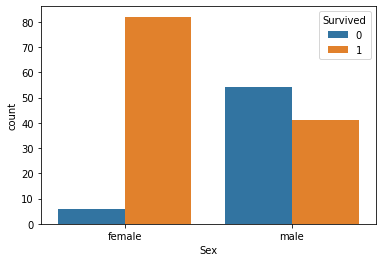

In [29]:
g=sns.countplot(x='Sex',hue='Survived',data=df_train)

In [27]:
# Q3
# Continuous (Age) v.s. Continuous (Fare)
corr,_=stats.pearsonr(df_train['Age'],df_train['Fare'])
print(corr)
# Age 與 Fare 無線性相關

-0.09242385620999947


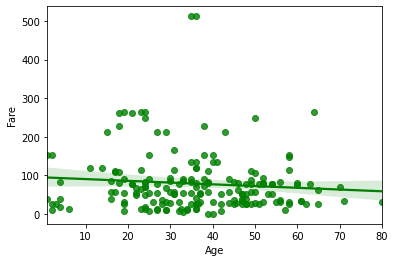

In [28]:
g=sns.regplot(x='Age',y='Fare',color='g',data=df_train)